In [1]:
import os
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
from keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [2]:
import tensorflow as tf

In [3]:
def melspectrogram(folder):
    genre_labels = []
    melspectrograms = []
    for f in os.scandir(folder):
        y, sr = librosa.core.load(f)
        label = str(f).split('.')[0][11:]
        genre_labels.append(label)
        spectrograms = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spectrograms = librosa.power_to_db(spectrograms, ref=np.max)
        if spectrograms.shape[1] != 660:
            spectrograms.resize(128,660, refcheck=False)
        melspectrograms.append(spectrograms)
    genre_labels = pd.Series(genre_labels)
    genreLabels = {'jazz': 0,
        'reggae': 1,
        'rock': 2,
        'blues': 3,
        'hiphop': 4,
        'country': 5,
        'metal': 6,
        'classical': 7,
        'disco': 8,
        'pop': 9}
    X = np.array(melspectrograms)
    y = genre_labels.map(genreLabels)
    
    return X, y

In [4]:
X, y = melspectrogram('wavfiles')

In [5]:
print(len(y))

1000


In [6]:
print(np.array(y))

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 128, 660) (200, 128, 660) (800,) (200,)


In [8]:
print(X_train.min())

-80.0


In [9]:
X_train /= -80
X_test /= -80

In [10]:
X_train = X_train.reshape(X_train.shape[0], 128, 660, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 660, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Feed Forward Neural Network (FFNN)

In [11]:
np.random.seed(23456)
model = Sequential()
model.add(Flatten(input_shape = (128, 660, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
ffnn_history = model.fit(X_train,y_train, batch_size=32,validation_data=(X_test, y_test),epochs=100)

C:\Users\yashw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.1203 - loss: 9.3391 - val_accuracy: 0.1000 - val_loss: 2.8637
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.1039 - loss: 2.5047 - val_accuracy: 0.1300 - val_loss: 2.4671
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.0964 - loss: 2.3368 - val_accuracy: 0.1500 - val_loss: 2.3160
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.1382 - loss: 2.3279 - val_accuracy: 0.1500 - val_loss: 2.2110
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.1522 - loss: 2.2125 - val_accuracy: 0.2050 - val_loss: 2.1476
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.1900 - loss: 2.1368 - val_accuracy: 0.1350 - val_loss: 2.2758
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.1908 - loss: 2.1798 - val_accuracy: 0.1350 - val_loss: 2.3517
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.1856 - loss: 2.1370 - val_accuracy: 0

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.7280 - loss: 0.7646 - val_accuracy: 0.3750 - val_loss: 2.2612
Epoch 52/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.6650 - loss: 0.9145 - val_accuracy: 0.3650 - val_loss: 2.4373
Epoch 53/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.6058 - loss: 1.0099 - val_accuracy: 0.2950 - val_loss: 2.9642
Epoch 54/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.5192 - loss: 1.3194 - val_accuracy: 0.3300 - val_loss: 2.0025
Epoch 55/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6744 - loss: 0.8123 - val_accuracy: 0.3850 - val_loss: 1.9593
Epoch 56/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7400 - loss: 0.7709 - val_accuracy: 0.2800 - val_loss: 3.2143
Epoch 57/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.6137 - loss: 1.0014 - val_accuracy: 0.3650 - val_loss: 2.0714
Epoch 58/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.7372 - loss: 0.7383 - val_accuracy: 0.345

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 84480)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,406,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,234,880 (61.93 MB)

 Trainable params: 5,411,626 (20.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,823,254 (41.29 MB)

In [13]:
metric_score = model.evaluate(X_test, y_test, verbose=0)
print("validation_loss = {:.2f} and validation_accuracy = {:.2f}".format(metric_score[0], metric_score[1]))

validation_loss = 4.18 and validation_accuracy = 0.28


In [14]:
_, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Training Accuracy: ",train_accuracy)
print("Testing Accuarcy: ",test_accuracy)
print("Validation_loss = {:.2f} and Validation_accuracy = {:.2f}".format(metric_score[0], metric_score[1]))

Training Accuracy:  0.44874998927116394
Testing Accuarcy:  0.2750000059604645
Validation_loss = 4.18 and Validation_accuracy = 0.28


In [15]:
from tensorflow.keras.regularizers import l2

# Constructing a CNN

In [16]:
np.random.seed(23456)
tf.random.set_seed(123)

CNN_model = Sequential(name='CNN')
CNN_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(128, 660, 1)))
CNN_model.add(MaxPooling2D(pool_size=(2,4)))
CNN_model.add(Conv2D(filters=32, kernel_size=(3,3), kernel_regularizer=l2(0.01), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2,4)))
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dropout(0.25))
CNN_model.add(Dense(10, kernel_regularizer=l2(0.01), activation='softmax'))
CNN_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = CNN_model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=30)




C:\Users\yashw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 456ms/step - accuracy: 0.1210 - loss: 2.7852 - val_accuracy: 0.1200 - val_loss: 2.5761
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - accuracy: 0.1291 - loss: 2.5528 - val_accuracy: 0.1050 - val_loss: 2.5129
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.1546 - loss: 2.4327 - val_accuracy: 0.2150 - val_loss: 2.3254
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 320ms/step - accuracy: 0.2118 - loss: 2.2878 - val_accuracy: 0.2100 - val_loss: 2.1870
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.2003 - loss: 2.1971 - val_accuracy: 0.2450 - val_loss: 2.0804
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 319ms/step - accuracy: 0.2248 - loss: 2.0895 - val_accuracy: 0.2200 - val_loss: 2.0725
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step - accuracy: 0.2539 - loss: 2.0301 - val_accuracy: 0.3750 - val_loss: 1.9549
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - accuracy: 0.3213 - loss: 1.9482 - val_accuracy: 0

In [17]:
CNN_model.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 658, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 164, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 162, 32)         │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 38400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       2,457,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,389,344 (28.19 MB)

 Trainable params: 2,463,114 (9.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,926,230 (18.79 MB)

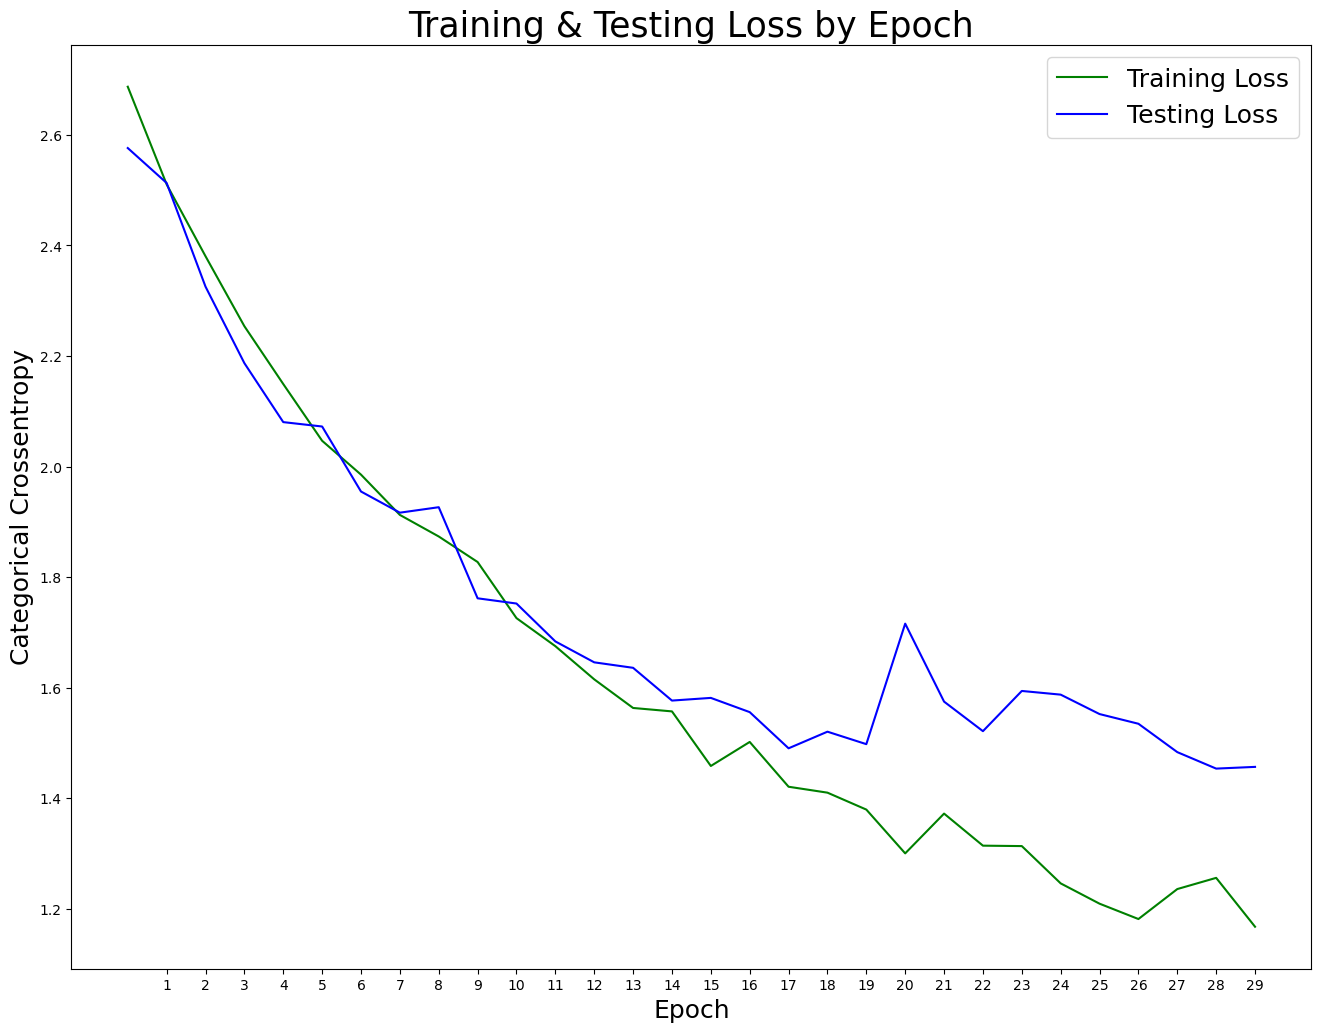

In [18]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(16, 12))
plt.plot(train_loss, label='Training Loss', color='Green')
plt.plot(test_loss, label='Testing Loss', color='Blue')
plt.title('Training & Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,30), range(1,30))
plt.legend(fontsize = 18);

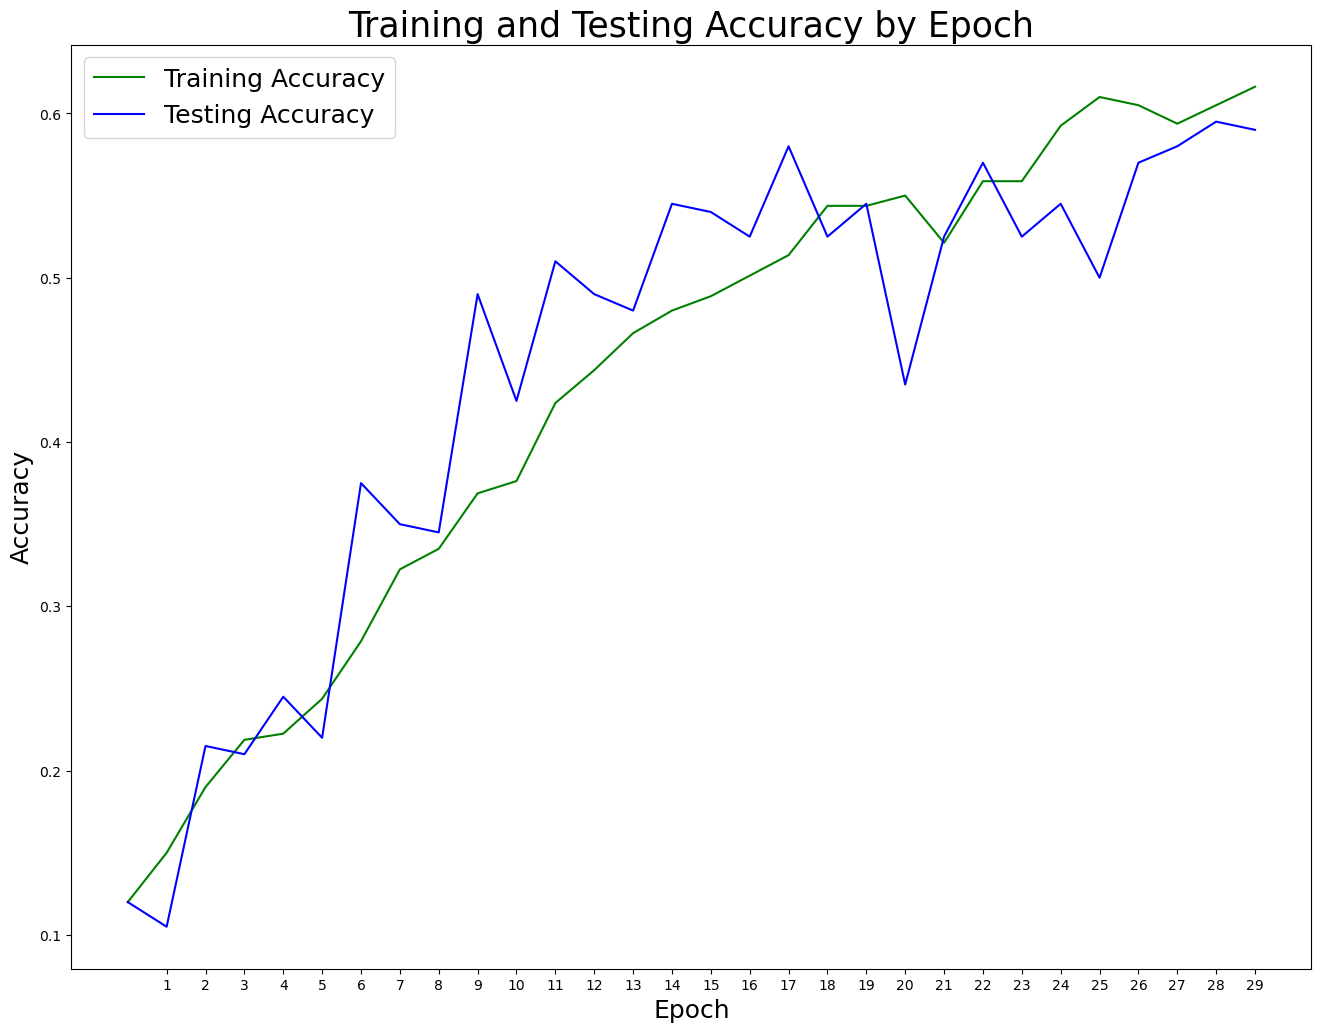

In [19]:
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']
plt.figure(figsize=(16, 12))
plt.plot(train_loss, label='Training Accuracy', color='green')
plt.plot(test_loss, label='Testing Accuracy', color='blue')
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(1,30), range(1,30))
plt.legend(fontsize = 18);

In [20]:
score = CNN_model.evaluate(X_test, y_test, verbose=0)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

val_loss = 1.457 and val_acc = 0.590


In [21]:
_, train_acc = CNN_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = CNN_model.evaluate(X_test, y_test, verbose=0)
print("Training accuracy: ",train_acc)
print("Testing accuarcy: ",test_acc)
print("val_loss = {:.3f} and val_acc = {:.3f}".format(score[0], score[1]))

Training accuracy:  0.8849999904632568
Testing accuarcy:  0.5899999737739563
val_loss = 1.457 and val_acc = 0.590


In [22]:
print(X_test.shape)
predictions = CNN_model.predict(X_test)

(200, 128, 660, 1)
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


In [23]:
predictions.shape

(200, 10)

In [24]:
for i in range(10): 
    print(f'{i}: {sum([1 for target in y_test if target[i] == 1])}')

0: 20
1: 20
2: 20
3: 20
4: 20
5: 20
6: 20
7: 20
8: 20
9: 20


In [25]:
for i in range(10): 
    print(f'{i}: {sum([1 for prediction in predictions if np.argmax(prediction) == i])}')

0: 15
1: 27
2: 16
3: 9
4: 23
5: 30
6: 21
7: 29
8: 14
9: 16


In [26]:
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predictions, 1))
conf_matrix.shape

(10, 10)

In [27]:
confusion_df = pd.DataFrame(conf_matrix)
confusion_df

,0,1,2,3,4,5,6,7,8,9
0,11,0,2,2,0,3,0,2,0,0
1,0,15,0,1,1,1,0,1,1,0
2,0,1,3,0,0,10,4,1,0,1
3,3,2,4,5,0,3,0,3,0,0
4,0,1,0,0,17,0,0,0,1,1
5,1,2,2,0,0,11,0,3,0,1
6,0,1,2,0,0,0,15,0,1,1
7,0,0,0,0,0,1,0,19,0,0
8,0,5,2,1,0,0,0,0,11,1
9,0,0,1,0,5,1,2,0,0,11


In [28]:
labels_dict = {
    0: 'jazz',
    1: 'reggae',
    2: 'rock',
    3: 'blues',
    4: 'hiphop',
    5: 'country',
    6: 'metal',
    7: 'classical',
    8: 'disco',
    9: 'pop'
}

In [29]:
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

,jazz,reggae,rock,blues,hiphop,country,metal,classical,disco,pop
jazz,11,0,2,2,0,3,0,2,0,0
reggae,0,15,0,1,1,1,0,1,1,0
rock,0,1,3,0,0,10,4,1,0,1
blues,3,2,4,5,0,3,0,3,0,0
hiphop,0,1,0,0,17,0,0,0,1,1
country,1,2,2,0,0,11,0,3,0,1
metal,0,1,2,0,0,0,15,0,1,1
classical,0,0,0,0,0,1,0,19,0,0
disco,0,5,2,1,0,0,0,0,11,1
pop,0,0,1,0,5,1,2,0,0,11


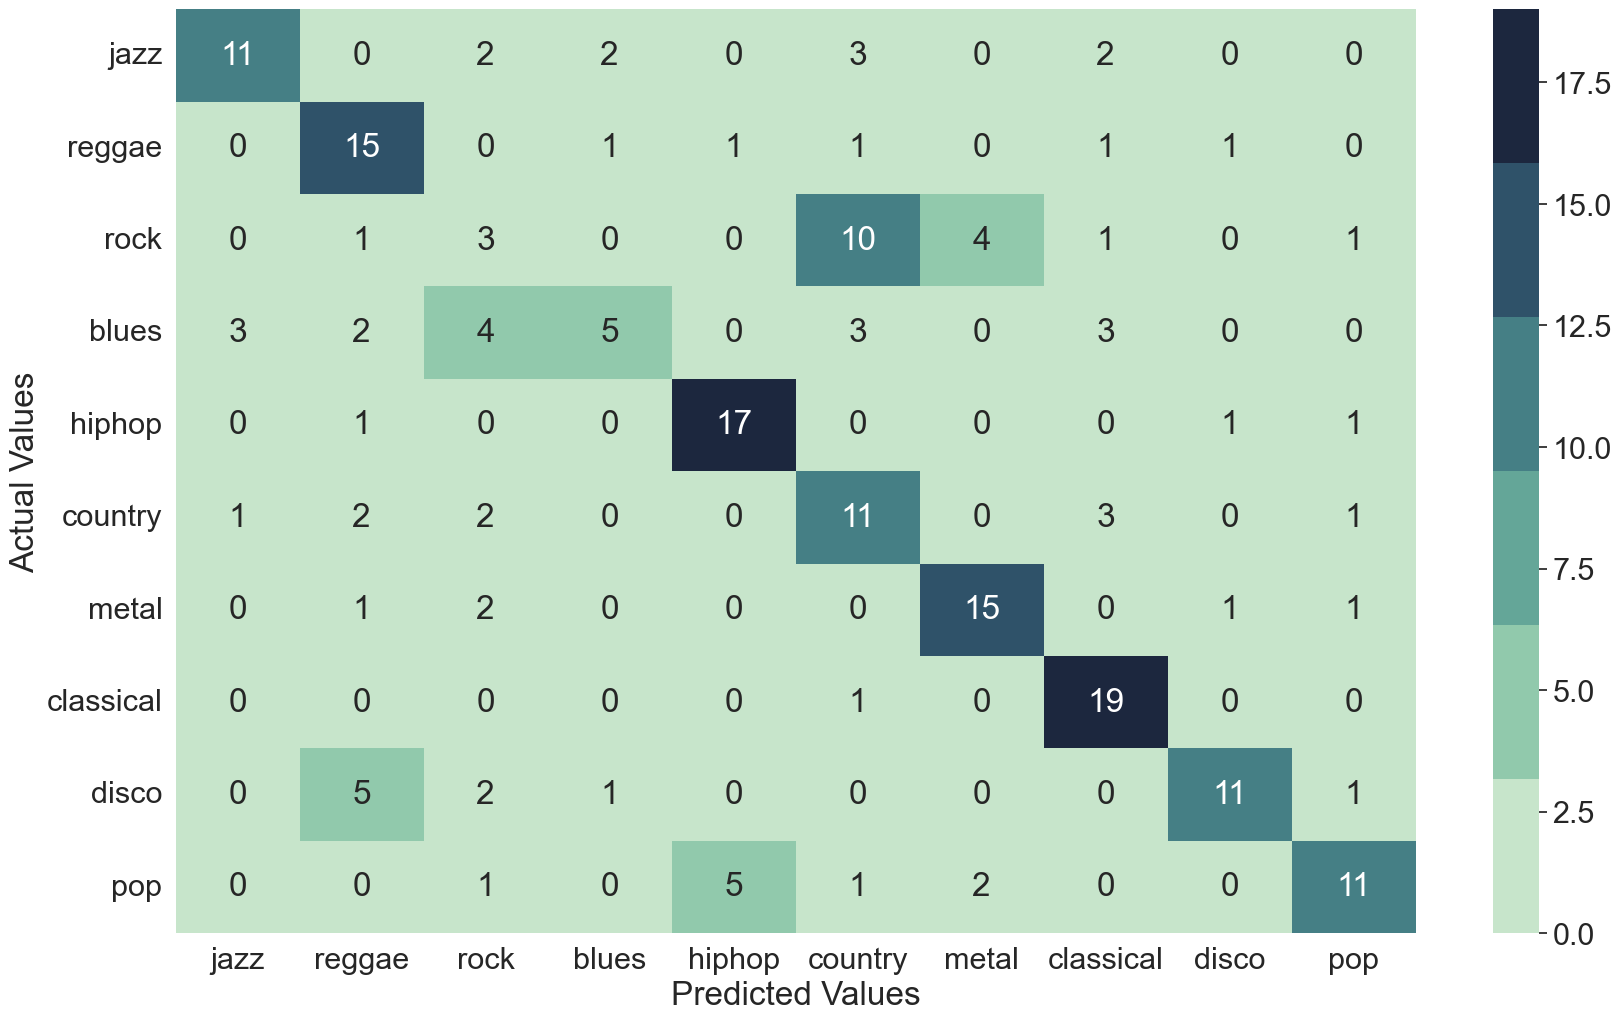

In [30]:
plt.figure(figsize= (20,12))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(rot=-.4));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

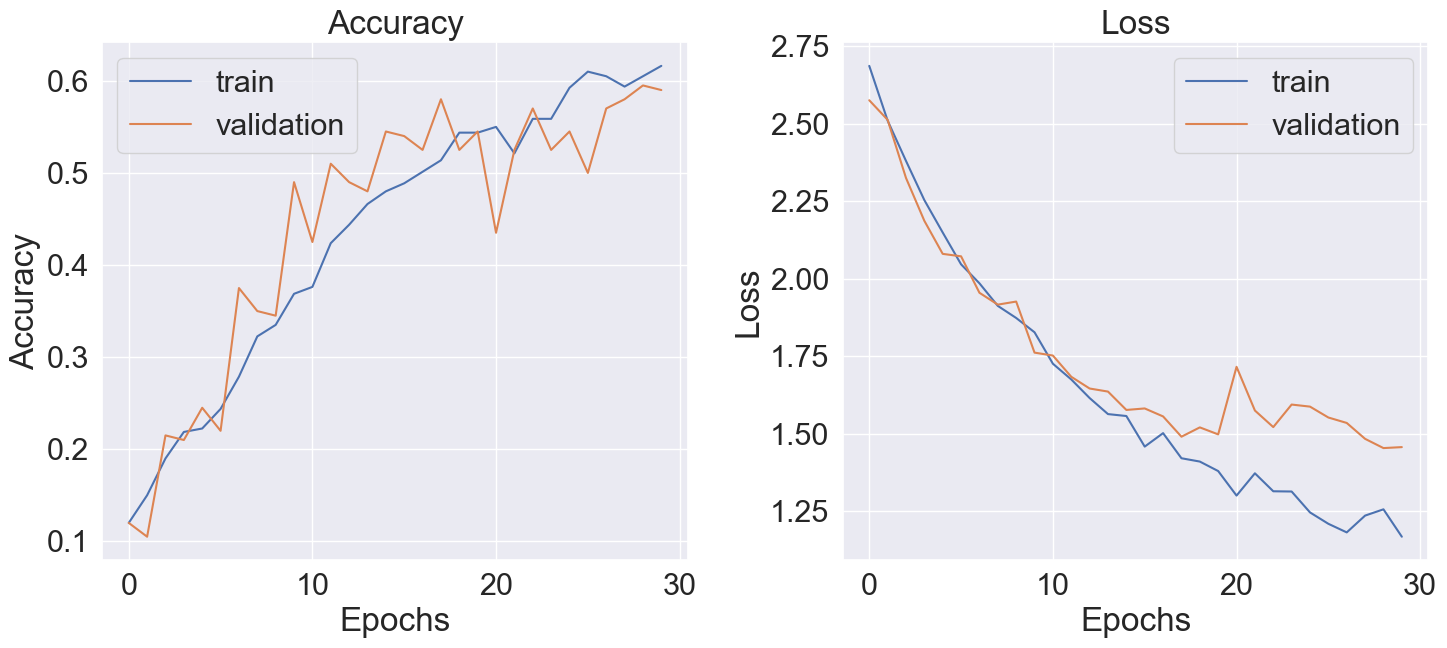

In [31]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlGn):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

In [33]:
preds = np.argmax(CNN_model.predict(X_test), axis = 1)
y_orig = np.argmax(y_test, axis = 1)
cm = confusion_matrix(preds, y_orig)
print(cm.shape)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
(10, 10)


Normalized confusion matrix


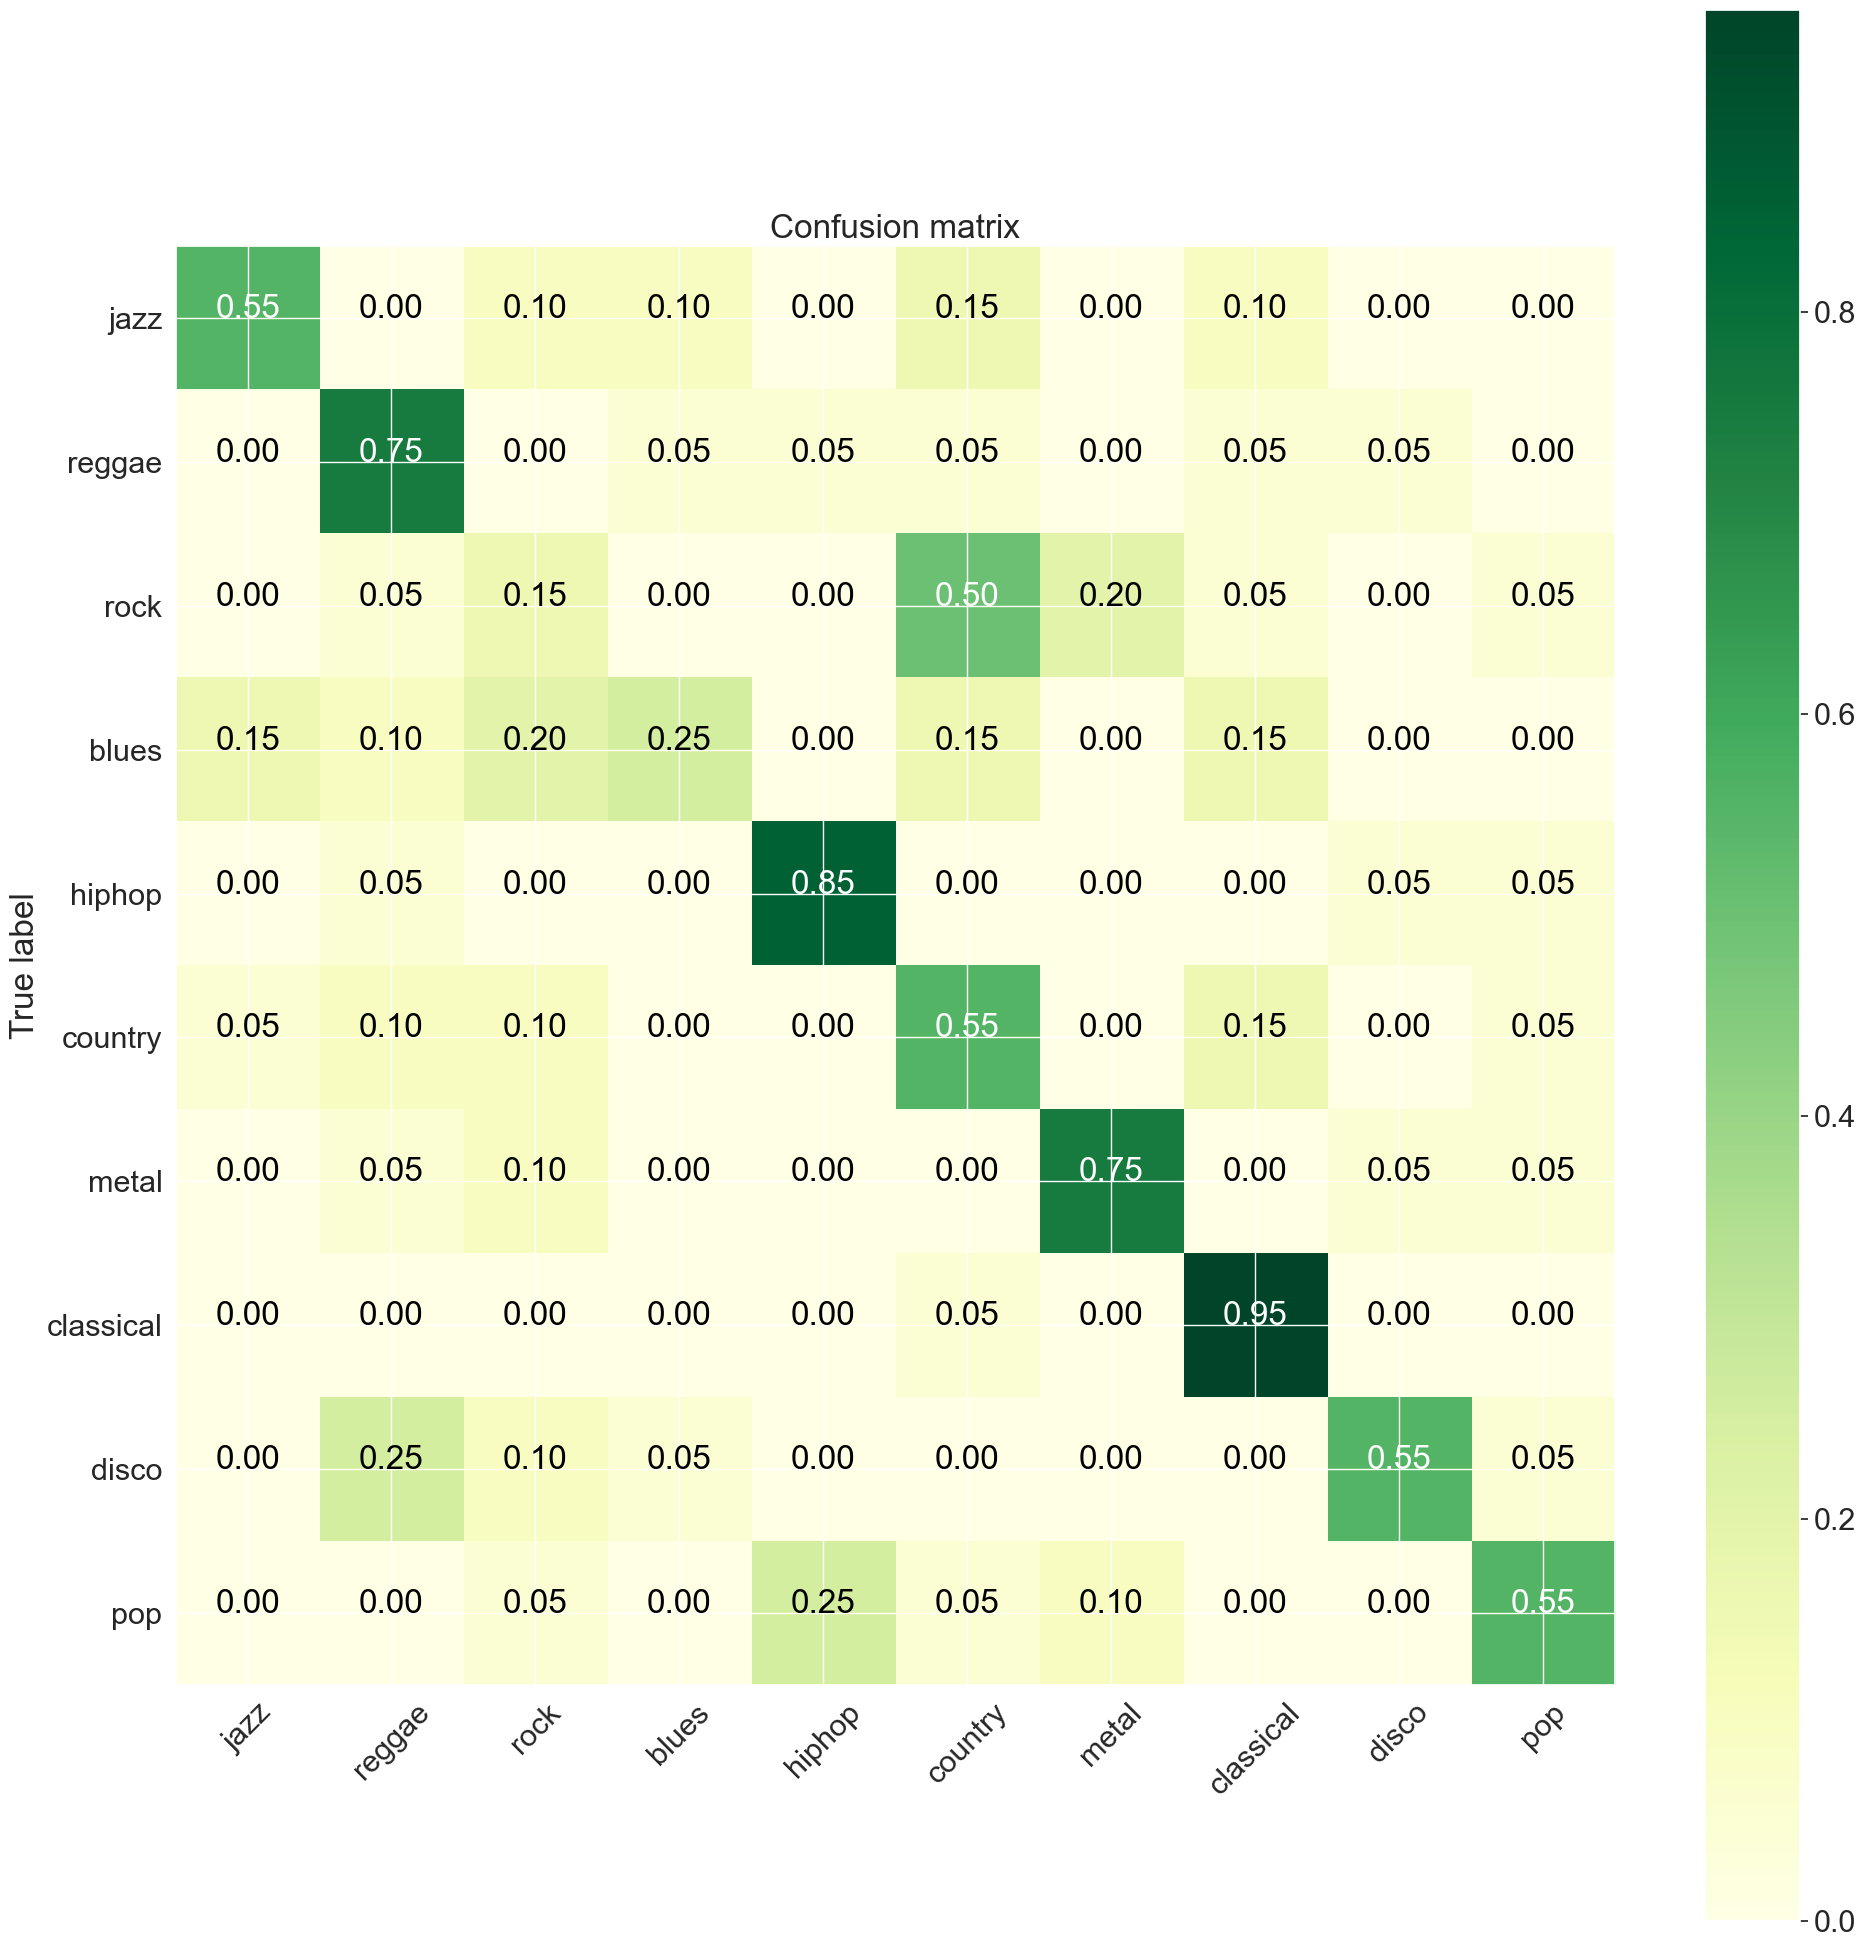

In [34]:
import collections
import itertools 
orderedDict = collections.OrderedDict()
from collections import OrderedDict
label_dict = {
        'jazz': 0,
        'reggae': 1,
        'rock': 2,
        'blues': 3,
        'hiphop': 4,
        'country': 5,
        'metal': 6,
        'classical': 7,
        'disco': 8,
        'pop': 9
    }
keys = OrderedDict(sorted(label_dict.items(), key=lambda t: t[1])).keys()
plt.figure(figsize=(20,20))
plot_confusion_matrix(conf_matrix, keys, normalize=True)